# 1.0 Project Overview

### 1.1 Real Life Problem
Customer churn is a major concern for telecommunication companies, as acquiring new customers is significantly more expensive than retaining existing ones. Many telecommunications providers aim to identify customers who are likely to stop using their mobile network so that pro-active retention strategies can be applied.


### 1.2 Invested stakeholders
The primary stakeholders of this project include SyriaTel’s business management, marketing and retention teams, customer service departments, and strategic decision-makers who are interested in reducing customer churn and improving long-term customer loyalty.

# 2.0 Business Understanding


### 2.1 Business Problem

SyriaTel is experiencing customer attrition and wants to reduce churn by identifying at-risk customers early.

Currently, SyriaTel lacks a data-driven method to:

1. Determine the estimated revenue at risk from customers who churn.

2. Predict which customers are likely to churn.

3. Understand the key factors driving customer dissatisfaction.


### 2.2 Business Questions

1. What is the estimated revenue at risk from customers who churn?

2. Can we accurately predict whether a customer will churn? 

3. Which customer behaviors and service features are most strongly associated with churn?


### 2.3 Business Objectives

1. Estimate the potential revenue at risk when customers churn.

2. Build a classification model to predict customer churn.

3. Identify key features associated with customer churn and retention to support data-driven decision-making.


### 2.4 Implications of the project findings to the real-world problem and stakeholders 

The findings of this project will help SyriaTel to: 

1. Understand the potential revenue impact of customer churn.

2. Identify at-risk customers early, enabling proactive retention strategies.

3. Gain insights into customer behaviors and service factors that influence churn, supporting targeted improvements in service quality and customer satisfaction.

# 3.0 Data Understanding

### 3.1 Data Description and Sources

+ The dataset contains customer-level data from SyriaTel collected over 9 months. Each row represents a single customer. This dataset is suitable for the project because it includes usage metrics, service plans, and customer service interactions which are key indicators of customer behavior and satisfaction. These variables provide meaningful insights into how customers use the mobile network, the types of services they subscribe to, and the level of support they require—all of which are closely linked to churn behavior. 

+ This dataset was sourced from Kaggle (https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset?resource=download). Kaggle is an online platform for data science and machine learning that allows users to learn, practice, and collaborate using real-world data and problems.

+ This dataset contains 21 feature columns and 3333 customer records.

### 3.2 Target Variable

 **- Churn (Boolean) -** Indicates whether a customer has discontinued service with the company.

+ True → Customer is likely to leave the service

+ False → Customer is likely to remain

This makes the task a binary classification problem.

### 3.3 Feature Categories

#### A. Customer Usage - These features capture how customers use the service.

+ total day minutes – total daytime call duration

+ total day calls – total number of calls made during the day

+ total day charge – total charges for daytime calls

+ total eve minutes – total evening call duration

+ total eve calls – total number of calls made in the evening

+ total eve charge – total charges for evening calls

+ total night minutes – total night call duration

+ total night calls – total number of calls made at night

+ total night charge – total charges for night calls

+ total intl minutes – total international call duration

+ total intl calls – total number of international calls

+ total intl charge – total charges for international calls

#### B. Service Plans - These features describe the type of services customers subscribe to.

+ international plan – whether the customer has an international calling plan

+ voice mail plan – whether voicemail plan is subscribed

+ number of voice mail messages


#### C. Customer Support - This is often a strong indicator of dissatisfaction, as customers typically contact customer service when they experience problems with the service.

+ number of customer service calls


#### D. Administrative Features

+ state – the state/region where the customer lives

+ account length – time (in days) the customer has had the account

+ area code – geographic telephone area code

#### E. Identifiers - unique identifier (to be excluded from modeling)

+ customer phone number

# 4.0 Data Preparation and Exploratory Data Analysis

In [1]:
# We will start by importing all necessary libraries

# For data loading, cleaning and exploratory data analysis
import pandas as pd
import numpy as np
from scipy import stats

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline

# For data pre-processing (Encoding and Scaling)
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# For data modelling 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# For feature selection 
from sklearn.feature_selection import RFE, RFECV

# For model evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc

#### 4.1 Descriptive Statistics of all the Features in the Dataset

In [2]:
# Loading the dataset and saving it as customer_df

customer_df = pd.read_csv('customer.csv')

# Confirming that the dataset has been loaded correctly by calling the first 5 rows
customer_df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# Basic description of the dataset

customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

#### Basic description of the Dataset

1. There are 3333 entries with 21 columns. 

2. Other than state, international plan, voice mail plan, churn which have an object datatype, the other features are of numerical datatype (float64, int64). 

#### 4.2 Selected features based on relevance

In [4]:
# Checking the information of our dataset and determining which features we will use for further analysis and which ones we can drop early on

customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Of the 21 columns, we might not benefit from factoring in phone number into further analysis since it is a unique identifier with no stastical significance as a predictor. Adding it might also infringe on privacy and ethical concerns. Therefore, we drop it.

In [5]:
# dropping the phone number column

customer_df = customer_df.drop('phone number', axis = 1)

# confirming that we have dropped the phone number column

customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

We have successfully dropped the 'phone number' column.

#### 4.3 Checking for missing data

In [6]:
# Checking for missing data 
customer_df.isna().sum()

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There is no missing values in this dataset.

#### 4.4 Checking for duplicated data

In [7]:
customer_df.duplicated().sum()

0

There are no duplicated values in this dataset.

#### 4.5 Exploratory Data Analysis and Visualization

In [8]:
# Global summary findings on the numerical dataset irrespective of whether customer churned or not. 
# We use the term global to mean that we are analyzing the dataset as a whole regardless of whether customer churned or not.
# We will select only columns with the numerical data type first

numerical_customer_df = customer_df.select_dtypes(include=['float64', 'int64'])


#### Summary findings on the global numerical features




In [9]:
# Iterate through the different columns and summarize the numerical features in means + std_dev

for numerical_column in numerical_customer_df.columns:
    print (f'This is the mean and standard deviation of the {numerical_column}: {numerical_customer_df[numerical_column].mean()} +/- {numerical_customer_df[numerical_column].std()}')

This is the mean and standard deviation of the account length: 101.06480648064806 +/- 39.822105928595604
This is the mean and standard deviation of the area code: 437.18241824182417 +/- 42.371290485606615
This is the mean and standard deviation of the number vmail messages: 8.099009900990099 +/- 13.688365372038598
This is the mean and standard deviation of the total day minutes: 179.77509750975094 +/- 54.46738920237137
This is the mean and standard deviation of the total day calls: 100.43564356435644 +/- 20.069084207300897
This is the mean and standard deviation of the total day charge: 30.562307230723075 +/- 9.2594345539305
This is the mean and standard deviation of the total eve minutes: 200.98034803480348 +/- 50.713844425812
This is the mean and standard deviation of the total eve calls: 100.11431143114311 +/- 19.922625293943103
This is the mean and standard deviation of the total eve charge: 17.083540354035403 +/- 4.310667643110341
This is the mean and standard deviation of the tot

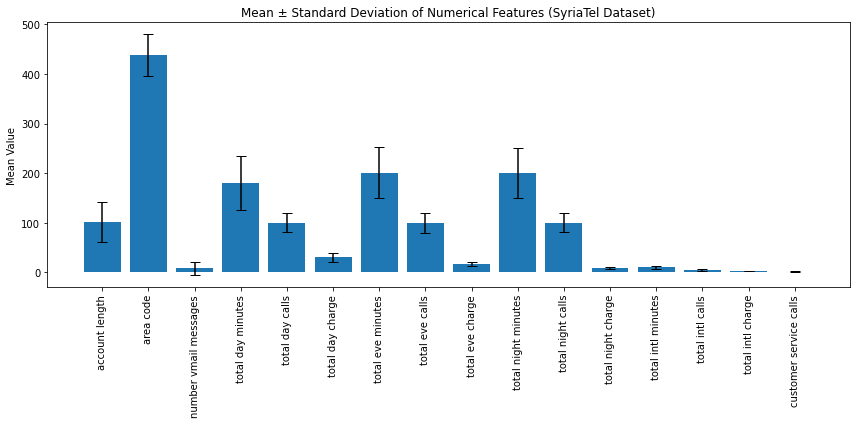

In [10]:
# Illustrating the findings on the global numerical features


means = numerical_customer_df.mean()
stds = numerical_customer_df.std()

plt.figure(figsize=(12,6))
plt.bar(numerical_customer_df.columns, means, yerr=stds, capsize=5)
plt.xticks(rotation=90)
plt.ylabel("Mean Value")
plt.title("Mean ± Standard Deviation of Numerical Features (SyriaTel Dataset)")
plt.tight_layout()
plt.show()


#### Summary findings on the global categorical features

In [11]:
# Select only columns with numerical data type

categorical_customer_df = customer_df.select_dtypes(include=['object'])

# Checking that we only have categorical variable in categorical_customer_df
categorical_customer_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   state               3333 non-null   object
 1   international plan  3333 non-null   object
 2   voice mail plan     3333 non-null   object
dtypes: object(3)
memory usage: 78.2+ KB


In [12]:
# Summary findings in distribution of value counts of the 3 object features
# for state, getting the 10 most common states

categorical_customer_df['state'].value_counts().head(10)

WV    106
MN     84
NY     83
AL     80
OH     78
OR     78
WI     78
VA     77
WY     77
CT     74
Name: state, dtype: int64

In [13]:
# summary value counts for international plan (whether a customer had it or not)
categorical_customer_df['international plan'].value_counts()


no     3010
yes     323
Name: international plan, dtype: int64

In [14]:
# summary value counts for voice mail plan (whether a customer had it or not)
categorical_customer_df['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

#### Overall summary of the global categorical features

1. The most common states were: WV, MN, NY, AL, WI, OH, OR, VA, WY, CT.

2. Most customers did not have international plan (3010 versus 323).

3. Most customers did not have a voice mail plan (2411 vs 922).

#### Differences based on whether a customer churned or not

In [15]:
# To determine whether there was any difference in the above numerical and categorical features based on whether a customer churned (1) or not (0):
# We plan to repeat the above steps again but this time separate those who churned vs those who did not and compare their findings
# Create a variable 'churned_customer' which contains all customers who churned and 'not_churned_customers' for those who did not churn

churned_customers = customer_df.loc[customer_df['churn'] == 1]
non_churned_customers = customer_df.loc[customer_df['churn'] == 0]

len(churned_customers), len(non_churned_customers) # There were 483 customers who churned vs 2850 who did not.

(483, 2850)

In [16]:
# Next we will create new variables that contain only numerical information in both groups.

churned_numerical_customer_df = churned_customers.select_dtypes(include=['float64', 'int64'])
non_churned_numerical_customers_df = non_churned_customers.select_dtypes(include = ['float64', 'int64'])

In [17]:
# Deriving the mean +/- standard deviation of the churned and non_churned numerical features
# Starting off with the churned
for numerical_column in churned_numerical_customer_df.columns:
    print (f'This is the mean and standard deviation of the {numerical_column}: {churned_numerical_customer_df[numerical_column].mean()} +/- {churned_numerical_customer_df[numerical_column].std()}')

This is the mean and standard deviation of the account length: 102.66459627329192 +/- 39.46782040739152
This is the mean and standard deviation of the area code: 437.8178053830228 +/- 42.792269798525105
This is the mean and standard deviation of the number vmail messages: 5.115942028985507 +/- 11.860138199216575
This is the mean and standard deviation of the total day minutes: 206.91407867494823 +/- 68.99779153758718
This is the mean and standard deviation of the total day calls: 101.33540372670808 +/- 21.58230721307551
This is the mean and standard deviation of the total day charge: 35.17592132505176 +/- 11.729709881783515
This is the mean and standard deviation of the total eve minutes: 212.41014492753624 +/- 51.72890955344904
This is the mean and standard deviation of the total eve calls: 100.56107660455487 +/- 19.72471059273491
This is the mean and standard deviation of the total eve charge: 18.05496894409938 +/- 4.396762264655277
This is the mean and standard deviation of the tota

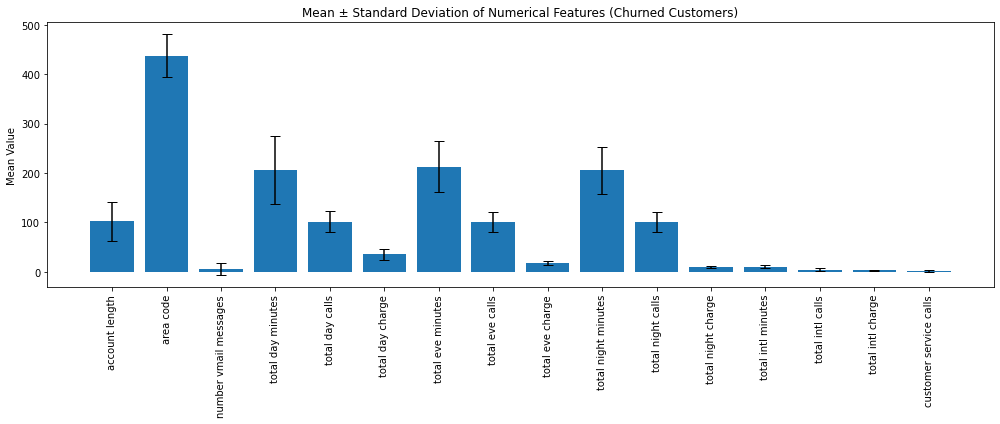

In [18]:
# Illustrating our findings for numerical features of the Churn group

# Calculate mean and std
means = churned_numerical_customer_df.mean()
stds = churned_numerical_customer_df.std()

features = means.index
x = np.arange(len(features))

plt.figure(figsize=(14,6))

plt.bar(x, means, yerr=stds, capsize=5)

plt.xticks(x, features, rotation=90)
plt.ylabel("Mean Value")
plt.title("Mean ± Standard Deviation of Numerical Features (Churned Customers)")
plt.tight_layout()
plt.show()

#### Objective 1: Estimating the potential revenue at risk when customers churn.

From the above output, the following were the average customer charges in the Churn group:

1. Total day charge = 35.17 

2. Total evening charge = 18.05 

3. Total night charge = 9.23 

4. Total international charge = 2.88


Total = 65.33 U.S dollars. Given that there were 483 customers who churned, this brings the total loss to about 31554.39 dollars over 9 months (which is the reported timeframe within which the data was collected).

In [19]:
# now deriving those of the non_churned group
for numerical_column in non_churned_numerical_customers_df.columns:
    print (f'This is the mean and standard deviation of the {numerical_column}: {non_churned_numerical_customers_df[numerical_column].mean()} +/- {non_churned_numerical_customers_df[numerical_column].std()}')

This is the mean and standard deviation of the account length: 100.79368421052632 +/- 39.88235017521783
This is the mean and standard deviation of the area code: 437.07473684210527 +/- 42.30615604448498
This is the mean and standard deviation of the number vmail messages: 8.604561403508772 +/- 13.913125391563675
This is the mean and standard deviation of the total day minutes: 175.1757543859649 +/- 50.18165518287504
This is the mean and standard deviation of the total day calls: 100.28315789473685 +/- 19.801156951805293
This is the mean and standard deviation of the total day charge: 29.780421052631578 +/- 8.530835463259525
This is the mean and standard deviation of the total eve minutes: 199.043298245614 +/- 50.292174620000246
This is the mean and standard deviation of the total eve calls: 100.03859649122808 +/- 19.958413717721953
This is the mean and standard deviation of the total eve charge: 16.918908771929825 +/- 4.274862704573758
This is the mean and standard deviation of the tot

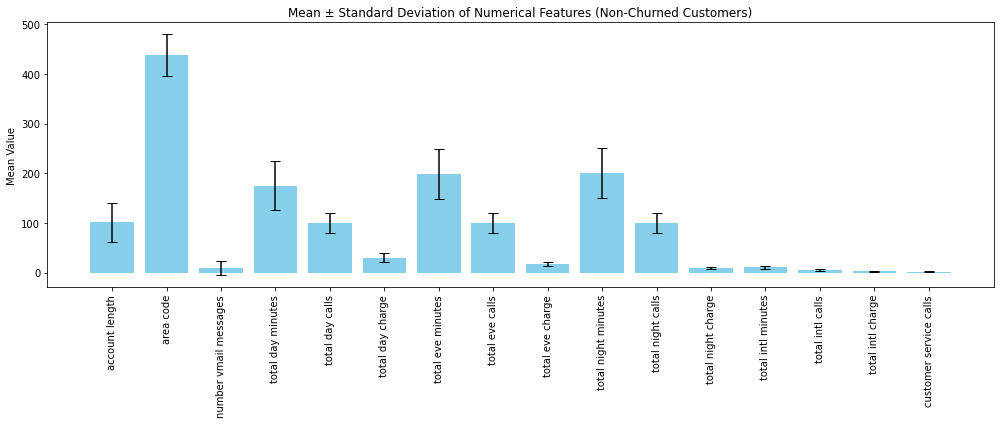

In [20]:
# Illustrating our findings for the non churned group

# Calculate mean and std
means = non_churned_numerical_customers_df.mean()
stds = non_churned_numerical_customers_df.std()

features = means.index
x = np.arange(len(features))

plt.figure(figsize=(14,6))

plt.bar(x, means, yerr=stds, capsize=5, color='skyblue')

plt.xticks(x, features, rotation=90)
plt.ylabel("Mean Value")
plt.title("Mean ± Standard Deviation of Numerical Features (Non-Churned Customers)")
plt.tight_layout()
plt.show()

In [21]:
# Ascertaining whether there are any statistically significant differences noted in the numerical features between the churned and non churned groups. 
# We will do this by creating a function and using a loop

# A/B Testing
# Question: Are there any statistically significant differences between those who churned vs those who did not on numerical features
# Null hypothesis: There is no difference between the groups.
# Alternate hypothesis: There is difference between the groups.
# Set value of alpha = 0.05

def ttest_churn(df, numerical_columns, churn_column='churn', alpha=0.05):
    """
    Performs Welch's t-test for each numerical column comparing churned vs non-churned customers.

    Parameters:
    - df: pandas DataFrame
    - numerical_columns: list of numerical column names
    - churn_column: name of the churn indicator column (0/1)
    - alpha: significance level (default 0.05)
    
    Returns:
    - results_df: DataFrame with t-statistic, p-value, and significance flag
    """
    
    results = []

    # Split the dataset into those who churned and those who did not.
    churned = df[df[churn_column] == 1]
    retained = df[df[churn_column] == 0]

    for col in numerical_columns:
        # Skip if column not in dataframe
        if col not in df.columns:
            continue
        
        # Get column values for each group
        churned_vals = churned[col].dropna()
        retained_vals = retained[col].dropna()

        # Perform Welch's t-test
        t_stat, p_value = stats.ttest_ind(churned_vals, retained_vals, equal_var=False)

        # Check significance
        significant = p_value < alpha

        # Append results
        results.append({
            'column': col,
            't_statistic': t_stat,
            'p_value': p_value,
            'significant': significant
        })

    results_df = pd.DataFrame(results)
    return results_df

# Let us call our new function
numerical_cols = numerical_customer_df.columns.tolist()  # this contains only the numerical columns of both those who churned and those who did not.
ttest_results = ttest_churn(customer_df, numerical_cols)

# View results
print(ttest_results)


                    column  t_statistic       p_value  significant
0           account length     0.961889  3.364575e-01        False
1                area code     0.353471  7.238496e-01        False
2    number vmail messages    -5.821254  8.764782e-09         True
3        total day minutes     9.684563  1.218968e-20         True
4          total day calls     1.002387  3.165434e-01        False
5         total day charge     9.684476  1.219876e-20         True
6        total eve minutes     5.272354  1.839080e-07         True
7          total eve calls     0.537389  5.911801e-01        False
8         total eve charge     5.271986  1.842608e-07         True
9      total night minutes     2.170889  3.028049e-02         True
10       total night calls     0.348818  7.273389e-01        False
11      total night charge     2.171007  3.027154e-02         True
12      total intl minutes     3.938851  9.065715e-05         True
13        total intl calls    -2.960420  3.185777e-03         

#### Summary findings of the Numerical Dataset between those who churned and those who did not.

**- For churned vs non_churned, the following features did not reveal statistical significant differences between the 2 groups -**

a. Account length - 103.6, 100.7

b. Area Code - 437.8, 437.1

c. Total day calls - 101.3, 100.2

d. Total eve calls - 100.5, 100.0

e. Total night calls - 100.3, 100.1


**- The following features revealed statistically significant differences between the 2 groups (churned vs non_churned): -**

a. Number of voice mail - 5.11, 8.6

b. Total day minutes - 206.9, 175.2

c. Total day charge - 35.1, 29.8

d. Total evening minutes - 212.4, 199.0

e. Total evening charge - 18.05, 16.9

f. Total night minutes - 205.2, 200.1

g. Total night charge - 9.2, 9.00

h. Total international minutes - 10.7, 10.2

g. Total international calls - 4.2, 4.5

h. Total international charge - 2.8, 2.7

i. Customer service calls - 2.2, 1.4

#### Consequence of the Numerical Comparison

Even though it may seem reasonable to drop the features which did not show statistical significance between those who churned and those who did not, we will plan to keep them because:

1. A feature that isn’t significant on its own might become useful when combined with others (interaction effects).

2. There could be correlation between features and dropping one solely because its mean difference isn’t significant could reduce redundancy and inadvertently remove predictive power.

3. Some features might be strategically important even if not statistically significant such as account length. Possibly customers who have been in the network longer might behave differently from those who have not.

In [22]:
#  Deriving the value counts of the categorical summary statistics between the 2 groups.

churned_categorical_customer_df = churned_customers.select_dtypes(include=['object'])
non_churned_categorical_customers_df = non_churned_customers.select_dtypes(include = ['object'])

In [23]:
# Starting off with 'State' distribution in the churned group
churned_categorical_customer_df['state'].value_counts().head(10)

TX    18
NJ    18
MD    17
MI    16
MN    15
NY    15
MT    14
MS    14
NV    14
SC    14
Name: state, dtype: int64

In [24]:
# Checking out the 'state' distribution in the non churned group
non_churned_categorical_customers_df['state'].value_counts().head(10)

WV    96
VA    72
AL    72
WI    71
MN    69
WY    68
OH    68
NY    68
OR    67
VT    65
Name: state, dtype: int64

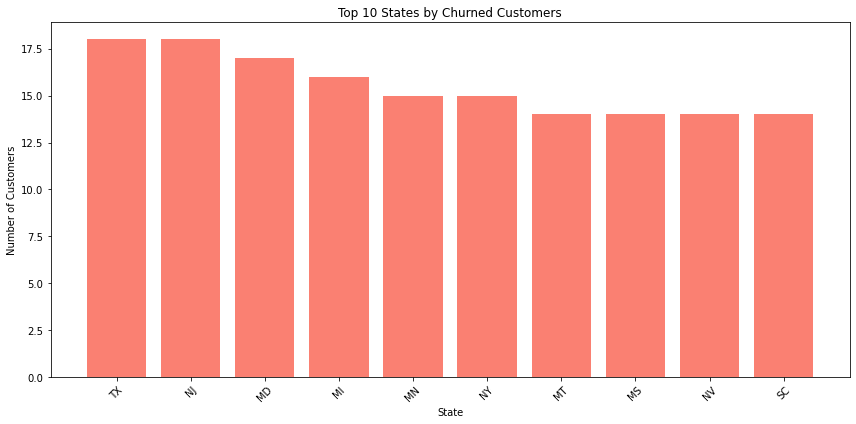

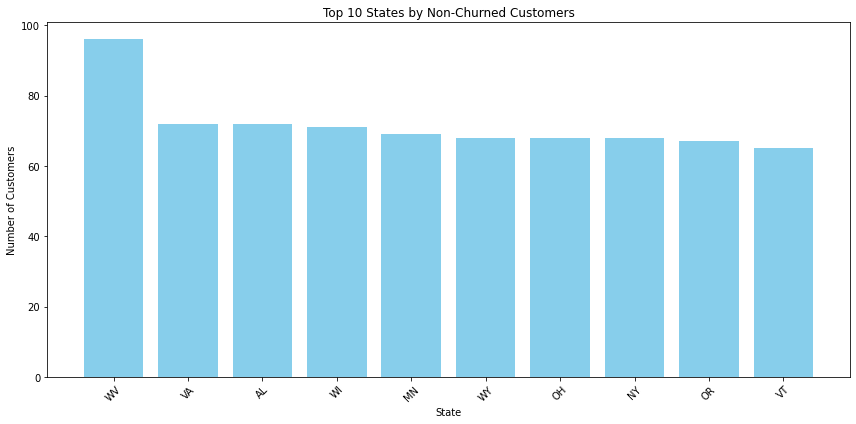

In [25]:
# Figure illustrating the 10 most common states for both Churn vs Non-Churn groups

# Get top 10 states by count
churned_top_states = churned_categorical_customer_df['state'].value_counts().head(10)
non_churned_top_states = non_churned_categorical_customers_df['state'].value_counts().head(10)

# Plot 1: Churned Customers
fig1, ax1 = plt.subplots(figsize=(12,6))
ax1.bar(churned_top_states.index, churned_top_states.values, color='salmon')
ax1.set_title('Top 10 States by Churned Customers')
ax1.set_xlabel('State')
ax1.set_ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Non-Churned Customers
fig2, ax2 = plt.subplots(figsize=(12,6))
ax2.bar(non_churned_top_states.index, non_churned_top_states.values, color='skyblue')
ax2.set_title('Top 10 States by Non-Churned Customers')
ax2.set_xlabel('State')
ax2.set_ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [26]:
# Now let us check the difference in value counts for 'international plan'

churned_categorical_customer_df['international plan'].value_counts(), non_churned_categorical_customers_df['international plan'].value_counts()

(no     346
 yes    137
 Name: international plan, dtype: int64,
 no     2664
 yes     186
 Name: international plan, dtype: int64)

In [27]:
# Now let us check the difference in value counts for 'voice mail plan'

churned_categorical_customer_df['voice mail plan'].value_counts(), non_churned_categorical_customers_df['voice mail plan'].value_counts()

(no     403
 yes     80
 Name: voice mail plan, dtype: int64,
 no     2008
 yes     842
 Name: voice mail plan, dtype: int64)

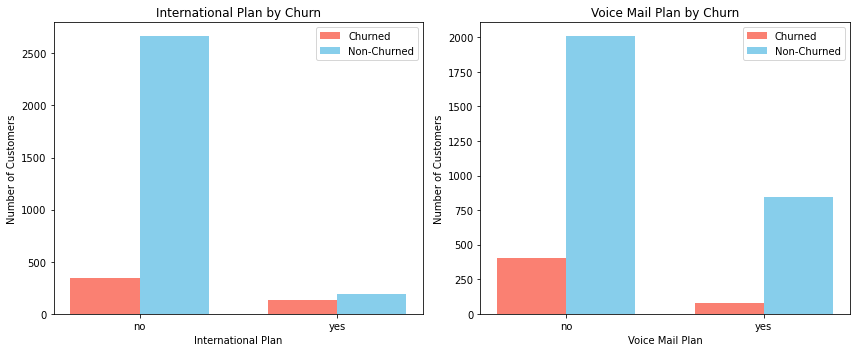

In [28]:
# Summarize findings on the differences in 'international plan' and 'voice mail plan' between the churn and non churn groups.

# Count categories
churned_international = churned_categorical_customer_df['international plan'].value_counts()
non_churned_international = non_churned_categorical_customers_df['international plan'].value_counts()

churned_voicemail = churned_categorical_customer_df['voice mail plan'].value_counts()
non_churned_voicemail = non_churned_categorical_customers_df['voice mail plan'].value_counts()

international_index = churned_international.index
voicemail_index = churned_voicemail.index

# Set up figure
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# International Plan
width = 0.35
x = range(len(international_index))

axes[0].bar(x, churned_international, width=width, label='Churned', color='salmon')
axes[0].bar([i + width for i in x], non_churned_international, width=width, label='Non-Churned', color='skyblue')

axes[0].set_xticks([i + width/2 for i in x])
axes[0].set_xticklabels(international_index)
axes[0].set_title('International Plan by Churn')
axes[0].set_xlabel('International Plan')
axes[0].set_ylabel('Number of Customers')
axes[0].legend()

# Voice Mail Plan
x = range(len(voicemail_index))
axes[1].bar(x, churned_voicemail, width=width, label='Churned', color='salmon')
axes[1].bar([i + width for i in x], non_churned_voicemail, width=width, label='Non-Churned', color='skyblue')

axes[1].set_xticks([i + width/2 for i in x])
axes[1].set_xticklabels(voicemail_index)
axes[1].set_title('Voice Mail Plan by Churn')
axes[1].set_xlabel('Voice Mail Plan')
axes[1].set_ylabel('Number of Customers')
axes[1].legend()

plt.tight_layout()
plt.show()


#### Summary Findings of the Categorical Dataset between those who churned and those who did not.

1. State differences:

+ Churned customers were primarily from TX, NJ, MD, MI, MN.

+ Non-churned customers were mainly from WV, VA, AL, WI, MN.

2. International plan:

+ Most customers in both groups did not have an international plan.

+ Churned: 346 without vs 137 with plan

+ Non-churned: 2664 without vs 186 with plan

3. Voicemail plan:

+ Similarly, most customers in both groups did not have a voicemail plan.

+ Churned: 403 without vs 80 with plan

+ Non-churned: 2008 without vs 842 with plan

#### Consequence of the Categorical Comparison

Even though the patterns for international plan and voicemail plan were similar across churned and non-churned customers, we opt to retain these features in our model since they can still be predictive of churn.

# 5.0 Data Modelling

#### 5.1 Prepare the data for modelling by One Hot Encoding the Categorical Features and Scaling the Numerical Features Using Standard Scaler

**- We scale the numerical features since they are all measured in different units, have different ranges, different means and variances. -**

**- One-Hot Encoding converts categorical variables into numerical binary columns so models can understand them. -**

**- Standard Scaler transforms the features so that they have a mean = 0, and standard deviation = 1. -**


In [29]:
# Split the data into X and Y datasets
X = customer_df.drop('churn', axis = 1)
y = customer_df['churn']


# Split into training and testing data and set test_size to 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Separate categorical and numerical features in both training and testing datasets

X_train_categorical = X_train.select_dtypes(exclude=["int64", "float64"])
X_train_numerical = X_train.select_dtypes(include=["int64", "float64"])

X_test_categorical = X_test.select_dtypes(exclude=["int64", "float64"])
X_test_numerical = X_test.select_dtypes(include=["int64", "float64"])

# One Hot Encode the categorical features
X_train_categorical_transformed = X_train_categorical.copy()
X_test_categorical_transformed = X_test_categorical.copy()

# Instantiate the One Hot Encoder

ohe = OneHotEncoder(drop = 'first', sparse = False)

# Fit the ohe to X_train then transform

ohe.fit(X_train_categorical)

X_train_ohe = pd.DataFrame(
    ohe.transform(X_train_categorical),
    index=X_train_categorical.index,
    columns=ohe.get_feature_names(X_train_categorical.columns))

# Only transform the X_test to prevent data leakage

X_test_ohe = pd.DataFrame(
    ohe.transform(X_test_categorical),
    index=X_test_categorical.index,
    columns=ohe.get_feature_names(X_train_categorical.columns))

# Scale the numerical data
# Instantiate the standard scaler

scaler = StandardScaler()

#Fit the scaler to X_train then transform
scaler.fit(X_train_numerical)
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_numerical),
    # index is important to ensure we can concatenate with other columns
    index=X_train_numerical.index,
    columns=X_train_numerical.columns)

    # Only transform the X_test to prevent data leakage
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_numerical),
    index=X_test_numerical.index,
    columns=X_test_numerical.columns)


# Merge the datasets back together to form 1 full dataset using pd.concatenate

# Concatenate the categorical and numeric X_train

X_train_full = pd.concat([X_train_scaled, X_train_ohe], axis = 1)

# Concatenate the categorical and numeric X_test

X_test_full = pd.concat([X_test_scaled, X_test_ohe], axis = 1)



#### 5.2 Create a Baseline Model Using Logistic Regression

- This model is easy to interpret the effects of features on probability.
- It is also fast and a simple baseline model.
- It also requires less data to train and is highly interpretable.
- It assumes a linear relationship between the variables.

In [30]:
# Instantiate the model
LR = LogisticRegression()

# Fit the X_train_full (the scaled and encoded version of X_train) and y_train to the model
LR.fit(X_train_full, y_train)

# Make predictions on X_test_full (modified version of X_test) using the model
y_lr_preds = LR.predict(X_test_full)

# Make probability predictions to use in calculating ROC, AUC
y_lr_pred_proba = LR.predict_proba(X_test_full)[:, 1]

#### 5.3 Create a Model Using Decision Tree Classifier

- Easily captures non-linear relationships and feature interactions.
- Handles categorical and numerical features without scaling though in our case, we did scale the numerical variables.
- Can capture complex patterns in datasets.
- Has an intuitive graphical interpretation as illustrated below.

In [31]:
# Instantiate the model
DC = DecisionTreeClassifier(criterion='entropy')

# Fit the data to the model
DC.fit(X_train_full, y_train)

# Make predictions on the X_test_full
y_dc_preds = DC.predict(X_test_full)

# Make probability predictions to use in calculating ROC, AUC
y_dc_pred_proba = DC.predict_proba(X_test_full)[:, 1]


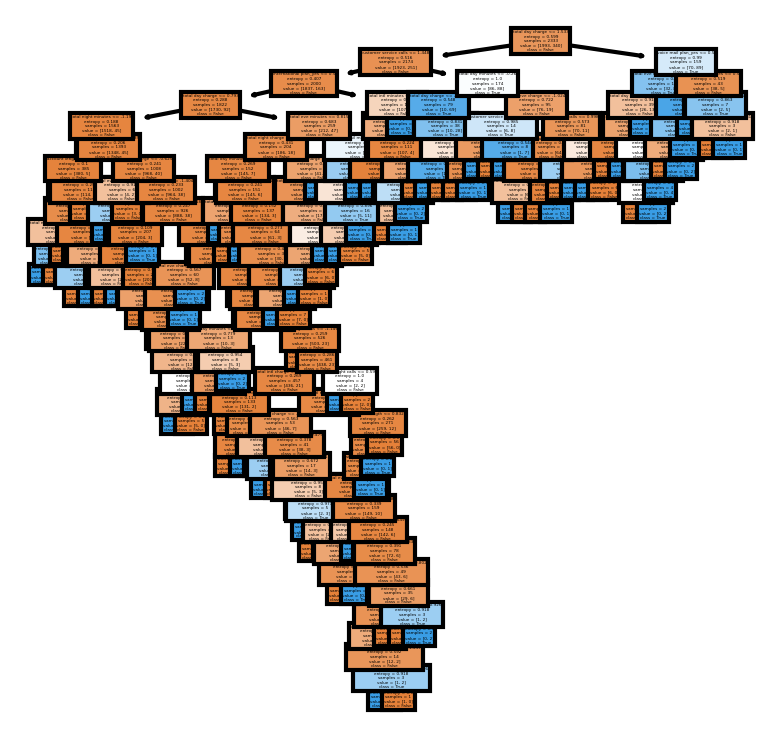

In [32]:
# Plotting a decision tree

fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)
tree.plot_tree(DC,
               feature_names = X_train_full.columns, 
               class_names=np.unique(y).astype(str),
               filled = True)
plt.show()

#### 5.4 Create a Model Using Random Forest Classifier

- Improves accuracy and stability over decision trees.
- Reduces overfitting from individual trees.
- Has a high accuracy and is robust to noise.
- Can handle high dimensional data like OHE features.
- Can estimate feature importance.

In [33]:
# Instantiate the model
RF = RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs = -1)

# Fit the data to the model
RF.fit(X_train_full, y_train)

# Predict on the X_test_full
y_rf_preds = RF.predict(X_test_full)

# Make probability predictions to use in calculating ROC, AUC
y_rf_pred_proba = RF.predict_proba(X_test_full)[:, 1]

# 6.0 Evaluation and Predictive Findings

We plan to evaluate carry out our evaluation using:

A. **- Accuracy -** of predicting the training and testing tests to determine overfitting and underfitting for the 3 models.
    Accuracy was preferred since it is simple and easy to communicate. It however may not be reliable for imbalanced classes hence we also aim to include the ROC.

B. **- ROC and AUC -** plots true positive to false positive rates. It works well with imbalanced datasets and shows trade-off between sensitivity and specificity.

#### 6.1 Accuracy

In [34]:
# Other than the y_predictions made above, in order to determine under or overfitting, let us predict on the X_train 
# We will use this prediction and call the model on it and the y_train 
# We shall then compare the training accuracy vs testing accuracy to determine potential of over or under fitting.

# For Logistic Regression
y_lr_pred_train = LR.predict(X_train_full)

# For Decision Classifier
y_dc_pred_train = DC.predict(X_train_full)

# For Random Forest Classifier
y_rf_pred_train = RF.predict(X_train_full)

In [35]:
# Assessing accuracy of the 3 models using a function

def evaluate_predictions(y_true, y_pred, model_name='Model'):
    """
    Evaluate a classification model using existing predictions.
    
    Parameters:
    - y_true: array-like, true labels
    - y_pred: array-like, predicted labels
    - model_name: str, optional name of the model
    
    Prints accuracy, confusion matrix, and classification report
    """
    print(f"=== {model_name} Evaluation ===")
    print("Accuracy:", round(accuracy_score(y_true, y_pred), 4))

# Evaluating the models using the function

# Logistic Regression
evaluate_predictions(y_test, y_lr_preds, model_name= LR)

# Decision Tree
evaluate_predictions(y_test, y_dc_preds, model_name= DC)

# Random Forest
evaluate_predictions(y_test, y_rf_preds, model_name= RF)


=== LogisticRegression() Evaluation ===
Accuracy: 0.86
=== DecisionTreeClassifier(criterion='entropy') Evaluation ===
Accuracy: 0.908
=== RandomForestClassifier(n_jobs=-1, random_state=42) Evaluation ===
Accuracy: 0.939


In [36]:
# Develop a similar function but now for training data.

def evaluate_training_predictions(y_true_train, y_pred_train, model_name='Model'):
    """
    Evaluate a classification model on TRAINING predictions.
    
    Parameters:
    - y_true_train: true labels for training set
    - y_pred_train: predicted labels for training set
    - model_name: optional name of the model
    
    Prints accuracy, confusion matrix, and classification report
    """
    print(f"=== {model_name} Training Evaluation ===")
    print("Accuracy:", round(accuracy_score(y_true_train, y_pred_train), 4))


# Evaluating the model on the training data

# Logistic Regression
evaluate_training_predictions(y_train, y_lr_pred_train, model_name= LR)

# Decision Tree
evaluate_training_predictions(y_train, y_lr_pred_train, model_name= DC)

# Random Forest
evaluate_training_predictions(y_train, y_lr_pred_train, model_name= RF)

=== LogisticRegression() Training Evaluation ===
Accuracy: 0.8706
=== DecisionTreeClassifier(criterion='entropy') Training Evaluation ===
Accuracy: 0.8706
=== RandomForestClassifier(n_jobs=-1, random_state=42) Training Evaluation ===
Accuracy: 0.8706


#### Objective 2: Best Classification Model to Predict Customer Churn.

1. Logistic Regression - 0.86 (Testing), 0.87 (Training)

2. Decision Classifier - 0.91 (Testing), 0.87 (Training)

3. Random Forest Classifier - 0.94 (Testing), 0.87 (Training)


* This summary suggest that the Random Forest Classifier has the best generalization while keeping training accuracy consistent with other models. It however has a higher testing accuracy than training, indicating possible data split randomness.

* The Decision Classifier is better than the Logistic Regression but less accurate for testing data than the Random Forest Classifier. It is worth noting that the testing accuracy was higher than the training accuracy. This could be due to random variation in the split.

* The Logistic Regression is simple but less accurate possibly because it missed out on capturing non-linear patterns. Despite this, the model generalizes well and is not overfitting since the accuracy scores for training and testing datasets are almost the same.


**- For the Random Forest and Decision Classifier models, the unexpected accuracy findings of the testing datasets being higher than training datasets could also be due to class imbalances. Recall that our data had only 483 customers who churned and 2850 who did not churn. This indicates Class imbalance. Consequently, accuracy would be dominated by the majority class and would not be the best measure of evaluation. At this point, we could resort to ROC/AUC which uses proportions and not raw counts.**

##### 6.2 ROC/AUC 

In [37]:
#  To plot our ROC/ AUC, let us begin by first calculating our tpr, fpr, thresholds using predict_proba y values.

# For logistic regression
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, y_lr_pred_proba)

# For Decision Classifier
dc_fpr, dc_tpr, dc_thresholds = roc_curve(y_test, y_dc_pred_proba)

# For Random Forest Classifier
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, y_rf_pred_proba)

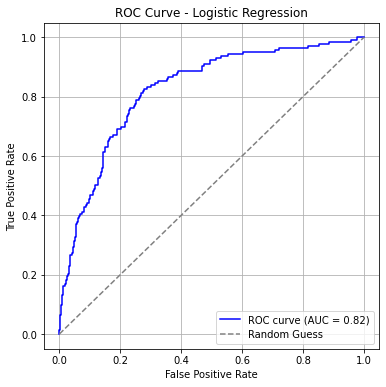

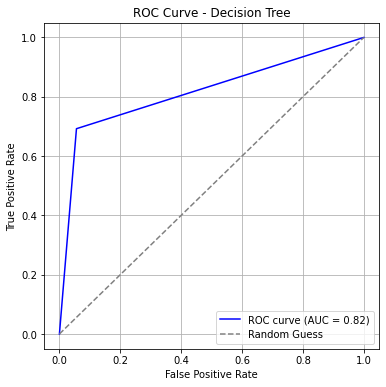

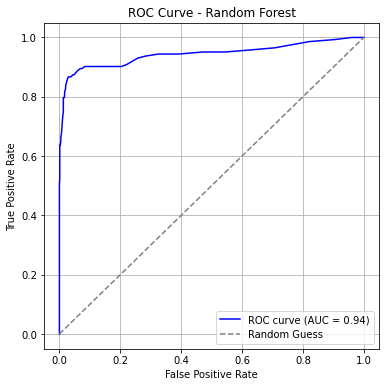

In [38]:
# Function to develop an ROC curve and AUC scores

def plot_roc_curve(fpr, tpr, thresholds=None, model_name='Model'):
    """
    Plot ROC curve and display AUC.
    
    Parameters:
    - fpr: array-like, false positive rates
    - tpr: array-like, true positive rates
    - thresholds: array-like, optional, classification thresholds
    - model_name: str, name of the model
    """
    # Calculate AUC
    roc_auc = auc(fpr, tpr)
    
    # Plot
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Using the function on our models
plot_roc_curve(lr_fpr, lr_tpr, model_name='Logistic Regression')
plot_roc_curve(dc_fpr, dc_tpr, model_name='Decision Tree')
plot_roc_curve(rf_fpr, rf_tpr, model_name='Random Forest')

#### Interpretation of the ROC and AUC scores

1. Random Forest Classifier

+ AUC: 0.93 (highest among the three models)

+ Interpretation: The ROC curve for Random Forest is closest to the top-left corner, meaning it achieves a high True Positive Rate (TPR) while keeping the False Positive Rate (FPR) low.

**_Implication_**: The model is excellent at distinguishing churners from non-churners and has the best ranking ability among the three models.

2. Decision Tree Classifier

+ AUC: 0.85 (second best)

+ Interpretation: The ROC curve is above the random line but below Random Forest.

**_Implication_**: The model correctly ranks positives vs negatives better than Logistic Regression but is less robust than Random Forest, likely because a single tree can overfit and is less stable.

3. Logistic Regression

+ AUC: 0.82 (lowest among the three)

+ Interpretation: The ROC curve is closer to the diagonal line than the other two models.

**_Implication_**: While it performs reasonably well, Logistic Regression is less capable of capturing complex, non-linear patterns, which explains its lower discriminative ability in this dataset.

#### 6.3 Selecting the best features from the best model

##### Objective 3: Identifying key factors associated with customer churn and retention to support data-driven decision-making

In [39]:
# We will address this question by applying Embedded methods (Lasso) - L1 to our Logistic Regression 
# Lasso adds a penalty to the loss function proportional to the absolute value of coefficients
# This way, Lasso can shrink irrelevant features’ coefficients to zero, effectively performing feature selection
# We shall use it with logistic regression

lr_l1 = LogisticRegression(penalty='l1', solver='liblinear')
lr_l1.fit(X_train_full, y_train)
selected_features = X_train_full.columns[lr_l1.coef_[0] != 0]
print(selected_features)

Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total night minutes',
       'total night calls', 'total intl calls', 'total intl charge',
       'customer service calls', 'state_AL', 'state_AR', 'state_AZ',
       'state_CA', 'state_CO', 'state_DC', 'state_DE', 'state_GA', 'state_HI',
       'state_IA', 'state_IL', 'state_KS', 'state_KY', 'state_LA', 'state_MD',
       'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT',
       'state_NC', 'state_ND', 'state_NJ', 'state_NM', 'state_NV', 'state_NY',
       'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN',
       'state_TX', 'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WY',
       'international plan_yes', 'voice mail plan_yes'],
      dtype='object')


In [40]:
# We could also attempt the same with Wrapper methods that are used to select features. We shall work with a default of 10 features, which should be about half of the features length.
# We shall use the Recursuve Feature Elimination (RFE) with logistic regression again and compare our findings to the one of Lasso

rfe = RFE(LogisticRegression(), n_features_to_select=10)
rfe.fit(X_train_full, y_train)
selected_features_2= X_train_full.columns[rfe.support_]

print(selected_features_2)

Index(['state_AL', 'state_IA', 'state_IL', 'state_MT', 'state_ND', 'state_NJ',
       'state_SC', 'state_VT', 'international plan_yes',
       'voice mail plan_yes'],
      dtype='object')


In [41]:
# Let us do more comparisons, this time using the decision trees
# Decision trees do natural filter selection because they pick features that best split the data at each node.

# Get feature importances
feature_importances = pd.Series(DC.feature_importances_, index=X_train_full.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print(feature_importances.head(10))

total day charge          0.164525
customer service calls    0.106515
international plan_yes    0.095018
total eve minutes         0.092811
total day minutes         0.085852
total intl calls          0.074698
total intl minutes        0.063061
total eve charge          0.041675
total night minutes       0.039354
account length            0.031634
dtype: float64


In [42]:
# Finally for the Random Forest Classifier
# These automatically select features during training because each tree chooses splits that maximize information gain or reduce Gini impurity.

# Get feature importances
feature_importances = pd.Series(RF.feature_importances_, index=X_train_full.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print(feature_importances.head(10))

total day charge          0.127207
total day minutes         0.115827
customer service calls    0.105351
international plan_yes    0.069539
total eve charge          0.057186
total eve minutes         0.055551
total intl charge         0.042666
total intl minutes        0.042199
total night minutes       0.039255
total night charge        0.037807
dtype: float64


#### Summary findings from the Model Evaluation

1. Logistic Regression:
+ The most influential features identified were the following states: AL, IL, ND, NJ, SC, TX, VA, VT, along with International Plan = Yes and Voice Mail Plan = Yes.

2. Decision Tree Classifier:
+ Key features included: total day charge, customer service calls, international plan_yes, total intl calls, total day minutes, total eve minutes, total eve charge, total intl charge, total night minutes, total night charge.

3. Random Forest Classifier:
+ The most important features were: total day charge, total day minutes, customer service calls, international plan_yes, total eve charge, total eve minutes, total intl charge, total intl minutes, total intl calls, total night charge.

# 7.0 Predictive Recommendation

**_Comparison of the Two Best Models (Decision Tree vs Random Forest):The shared features across both models were: total day charge, total day minutes, customer service calls, international plan_yes, total eve charge, total eve minutes, total intl charge, total intl calls, total night charge. These features appear consistently important for predicting customer churn_**

# 8.0 Limitations of the Data Set

The following are potential limitations of this dataset:

1. Limited time frame:

+ The dataset is collected over a short period, which may not capture seasonal or long-term usage patterns.

2. Class imbalance:

+ The number of churned customers is much smaller than non-churned, which can affect model performance and bias predictions toward the majority class.

3. Geographic bias:

+ States are included, but the dataset may not represent the full national population or capture regional variations accurately.

# 9.0 Suggestions for further analysis

Some suggestions to improve on the dataset include:

1. Adding more customer attributes:

+ Demographics: age, gender, income, occupation.

+ Subscription details: contract type, tenure, plan changes, add-ons.

+ Service quality metrics: dropped calls, network coverage, complaint history.

2. Increasing dataset size and diversity:

+ Collect data across multiple time periods and regions to improve model generalization.

+ Balance the dataset better between churned and non-churned customers to reduce class imbalance.